**Visão geral do projeto**

Na empresa de mineração OilyGiant. A tarefa é encontrar os melhores lugares para o desenvolvimento de novos poços de petróleo.

Para concluir essa tarefa, vai precisar executar as seguintes etapas:

Ler os arquivos com parâmetros coletados de poços de petróleo na região selecionada: a quantidade de petróleo e o volume de reservas;
Construir um modelo para predizer o volume de reservas em novos poços;
Escolher os poços de petróleo que têm os maiores valores estimados;
Escolher a região com o maior lucro total para os poços de petróleo selecionados.
Tem dados sobre amostras de petróleo de três regiões. Os parâmetros de cada poço de petróleo na região já são conhecidos. Construa um modelo que te ajudará a escolher a região com a margem de lucro mais alta. Utilize a técnica de Bootstrapping para analisar lucro potencial e riscos.

**Descrição de dados**

Os dados de exploração geológica para as três regiões estão armazenados em arquivos:

geo_data_0.csv. baixe o conjunto de dados
geo_data_1.csv. baixe o conjunto de dados
geo_data_2.csv. baixe o conjunto de dados
id — identificador unívoco de poço de petróleo
f0, f1, f2 — três características de pontos (seu significado específico não é importante, mas as próprias características são significativas)
product — volume de reservas no poço de petróleo (milhares de barris).

**Condições:**

Apenas regressão linear deve ser usada para o treinamento do modelo.
Ao explorar a região, um estudo de 500 pontos é realizado e os melhores 200 pontos são selecionados para calcular o lucro.
O orçamento para o desenvolvimento de 200 poços de petróleo é 100 milhões de dólares.
Um barril de petróleo bruto traz 4.5 dólares de receita. A receita de uma unidade de produto é 4.500 dólares (o volume de reservas está em milhares de barris).
Depois de ter avaliado os riscos, mantenha apenas as regiões com o risco de perdas inferior a 2.5%. Entre aquelas que se enquadram no critério, você precisa selecionar a região com o lucro médio mais alto.
Os dados são sintéticos e não incluem nenhum detalhe de contratos ou características de poços.

**Instruções do projeto**

In [1]:
#1.Baixe e prepare os dados. Explique o procedimento.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import stats                                 #Importando os dados necessários
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_zero = pd.read_csv('geo_data_0.csv')
df_one = pd.read_csv('geo_data_1.csv')    #Fazendo a Leitura dos arquivos CSV
df_two = pd.read_csv('geo_data_2.csv')

In [3]:
df_zero

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
#Análise de Proporção
print("--- Proporção de 'product' em df_zero ---")
proporcao_df_zero = df_zero['product'].value_counts(normalize=True)
print(proporcao_df_zero.head())
print("\n")

# Você pode repetir isso para os outros DataFrames, se tiverem a mesma coluna
print("--- Proporção de 'product' em df_one ---")
proporcao_df_one = df_one['product'].value_counts(normalize=True)
print(proporcao_df_one.head())
print("\n")

print("--- Proporção de 'product' em df_two ---")
proporcao_df_two = df_two['product'].value_counts(normalize=True)
print(proporcao_df_two.head())
print("\n")

--- Proporção de 'product' em df_zero ---
product
69.820169     0.00001
143.162634    0.00001
29.627803     0.00001
51.185681     0.00001
105.767494    0.00001
Name: proportion, dtype: float64


--- Proporção de 'product' em df_one ---
product
53.906522    0.08472
26.953261    0.08468
84.038886    0.08431
57.085625    0.08390
3.179103     0.08337
Name: proportion, dtype: float64


--- Proporção de 'product' em df_two ---
product
96.530159     0.00001
92.343074     0.00001
43.976501     0.00001
30.399919     0.00001
101.033880    0.00001
Name: proportion, dtype: float64




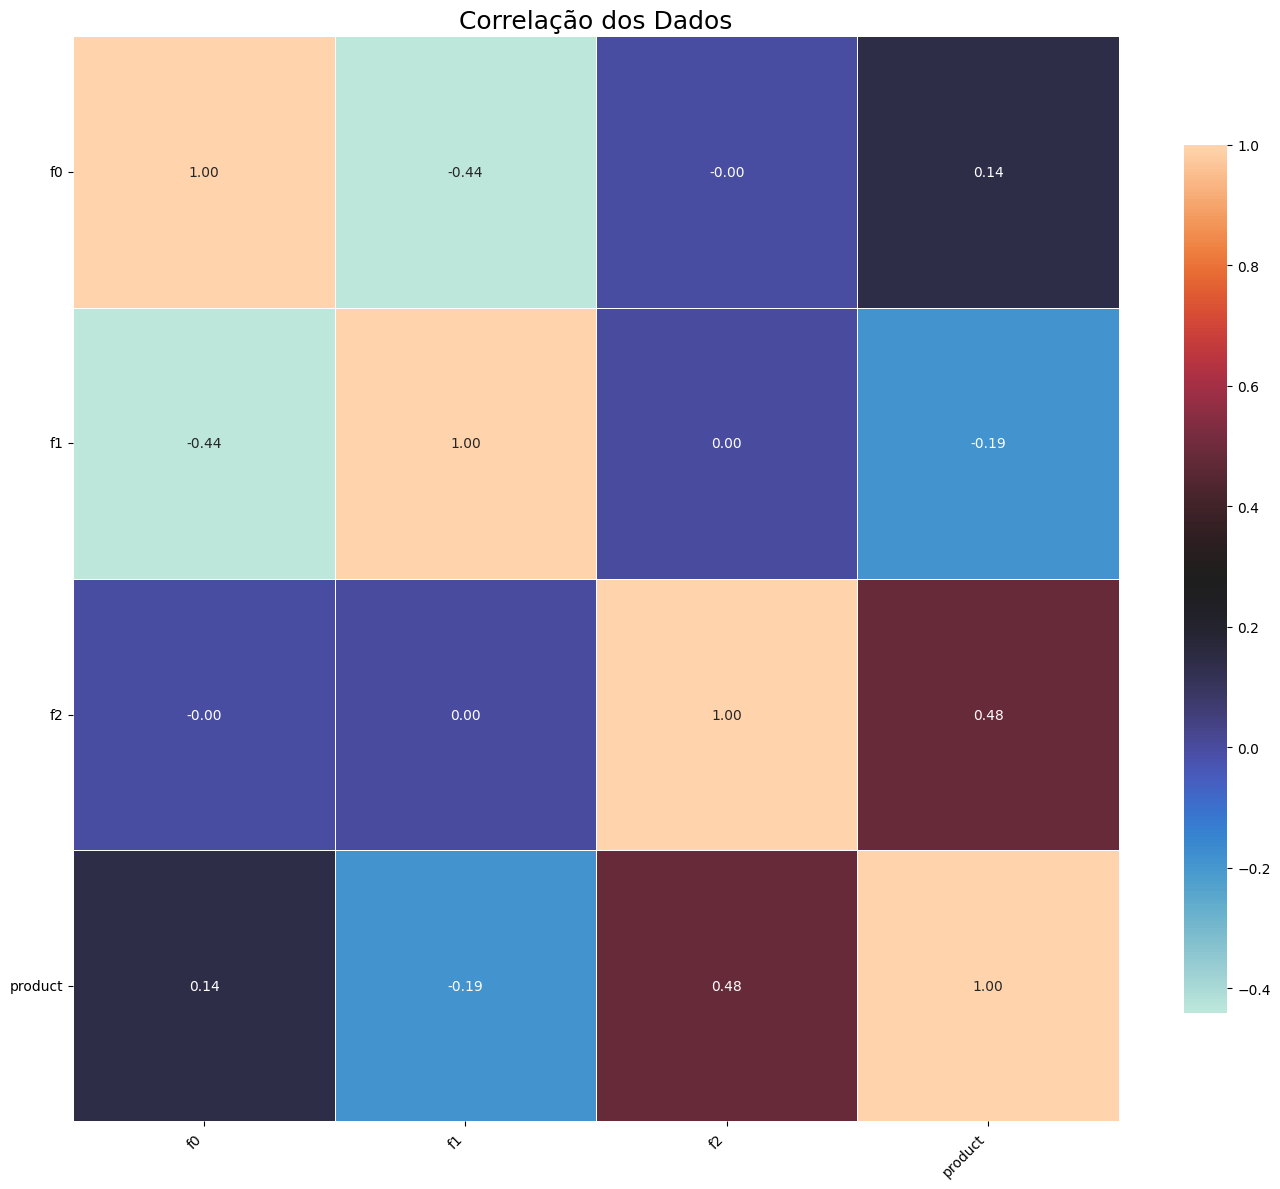

In [5]:
#Correlação Heatmap

correlation_matrix = df_zero.corr(numeric_only=True)

plt.figure(figsize=(14, 12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='icefire', fmt=".2f", linewidths=.5, cbar_kws={'shrink': .8})
plt.title('Correlação dos Dados', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout() 
plt.show()

**Conclusão**
A variável 'f2' é a que apresenta a correlação linear mais forte e positiva com o 'product'. 'f0' e 'f1' têm correlações fracas com o 'product', sendo 'f0' positiva e 'f1' negativa. Além disso, 'f0' e 'f1' possuem uma correlação negativa moderada entre si, enquanto 'f2' parece ser linearmente independente de 'f0' e 'f1'.

Essas informações são cruciais para entender quais variáveis preditoras ('f0', 'f1', 'f2') podem ser mais relevantes na previsão ou modelagem do 'product'. Por exemplo, 'f2' seria um bom candidato para um modelo preditivo do 'product'.

In [6]:
df_one

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


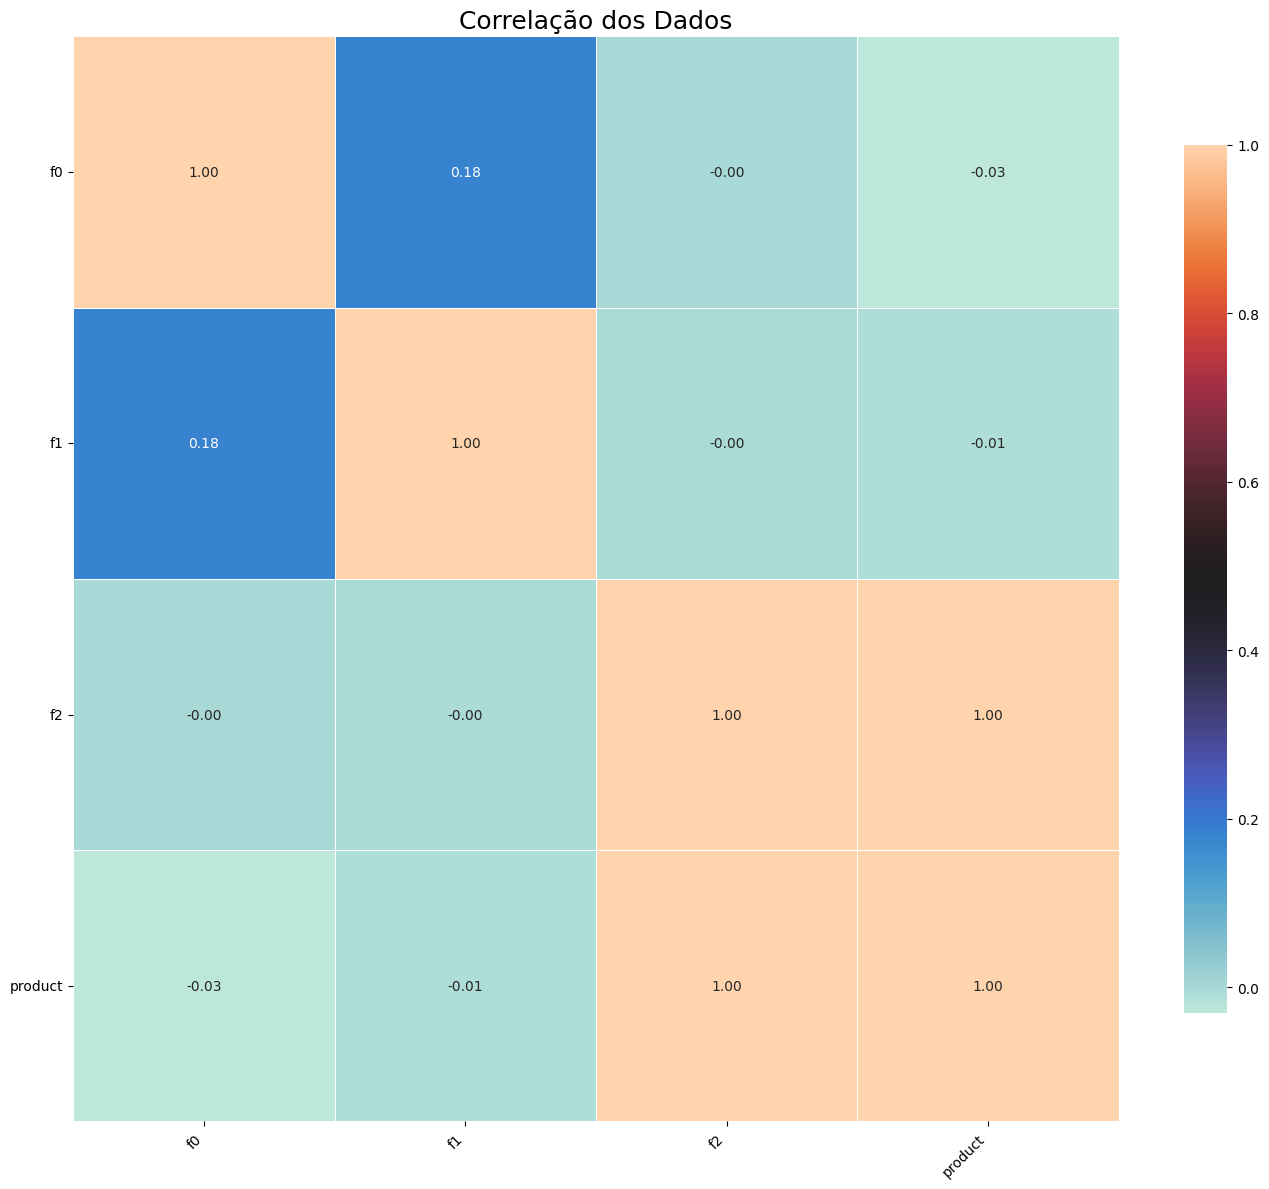

In [7]:
#Correlação Heatmap

correlation_matrix = df_one.corr(numeric_only=True)

plt.figure(figsize=(14, 12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='icefire', fmt=".2f", linewidths=.5, cbar_kws={'shrink': .8})
plt.title('Correlação dos Dados', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout() 
plt.show()

**Conclusão**
A conclusão mais significativa é a correlação perfeita entre "f2" e "product". Isso sugere que "f2" é uma variável extremamente importante e provavelmente determinante para "product". As outras variáveis ("f0" e "f1") têm correlações muito fracas ou nulas com "product", indicando que elas não são bons preditores lineares de "product" e podem ter pouca influência direta sobre ele.

In [8]:
df_two

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


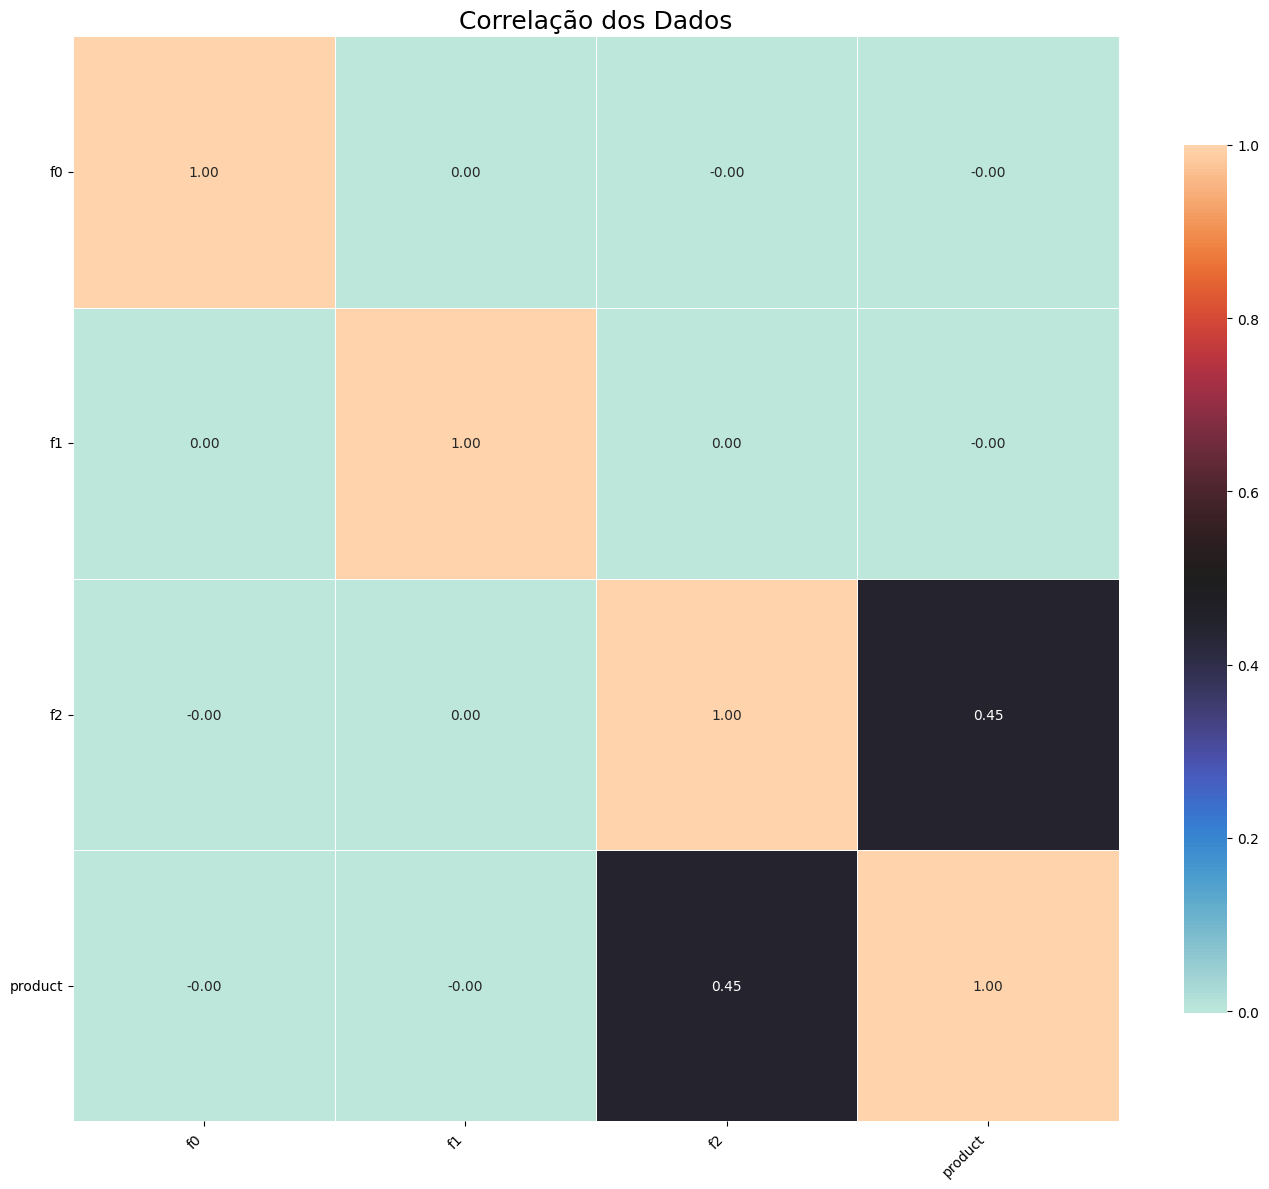

In [9]:
#Correlação Heatmap

correlation_matrix = df_two.corr(numeric_only=True)

plt.figure(figsize=(14, 12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='icefire', fmt=".2f", linewidths=.5, cbar_kws={'shrink': .8})
plt.title('Correlação dos Dados', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout() 
plt.show()

**Conclusão**
Com base nesta matriz de correlação, f2 parece ser a única característica que tem uma relação linear positiva notável com product. As características f0 e f1 parecem ter pouca ou nenhuma relação linear com product ou entre si. Isso é importante para a seleção de características em modelos de machine learning, pois sugere que f2 pode ser mais relevante para prever product do que f0 e f1.

In [10]:
#2.Treine e teste o modelo para cada região em geo_data_0.csv:

# Se você tiver um ID de região, não o inclua nas características de treinamento do modelo
features = ['f0', 'f1', 'f2'] # Exemplo: F0, F1, F2 são as características
target = 'product'          # Exemplo: 'product' é a variável que queremos prever

X = df_zero[features]
y = df_zero[target]

print(f"Variáveis independentes (X):\n{X.head()}")
print(f"Variável dependente (y):\n{y.head()}")

Variáveis independentes (X):
         f0        f1        f2
0  0.705745 -0.497823  1.221170
1  1.334711 -0.340164  4.365080
2  1.022732  0.151990  1.419926
3 -0.032172  0.139033  2.978566
4  1.988431  0.155413  4.751769
Variável dependente (y):
0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64


In [11]:
# Dividir os dados em 80% treino e 20% teste
# random_state garante que a divisão seja a mesma cada vez que você rodar o código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")
print(f"Tamanho do conjunto de treino (y_train): {y_train.shape}")
print(f"Tamanho do conjunto de teste (y_test): {y_test.shape}")

Tamanho do conjunto de treino (X_train): (80000, 3)
Tamanho do conjunto de teste (X_test): (20000, 3)
Tamanho do conjunto de treino (y_train): (80000,)
Tamanho do conjunto de teste (y_test): (20000,)


In [12]:
# Criar uma instância do modelo de Regressão Linear
model = LinearRegression()

# Treinar o modelo usando os dados de treino
model.fit(X_train, y_train)

print("Modelo de Regressão Linear treinado com sucesso!")
print(f"Coeficientes do modelo: {model.coef_}")
print(f"Intercepto do modelo: {model.intercept_}")

Modelo de Regressão Linear treinado com sucesso!
Coeficientes do modelo: [  3.86230378 -14.28229978   6.58717561]
Intercepto do modelo: 77.66430534166082


In [13]:
y_pred = model.predict(X_test)

print(f"Primeiras 5 previsões:\n{y_pred[:5]}")
print(f"Primeiros 5 valores reais (y_test):\n{y_test.head().values}")

Primeiras 5 previsões:
[101.91568241  78.25676707 115.29559527 105.65141921  97.98870873]
Primeiros 5 valores reais (y_test):
[122.07334983  48.73853962 131.33808824  88.32775748  36.95926621]


In [14]:
# Calcular o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")

# Calcular o R-quadrado (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R-quadrado): {r2:.2f}")

Erro Quadrático Médio (MSE): 1417.57
Coeficiente de Determinação (R-quadrado): 0.27


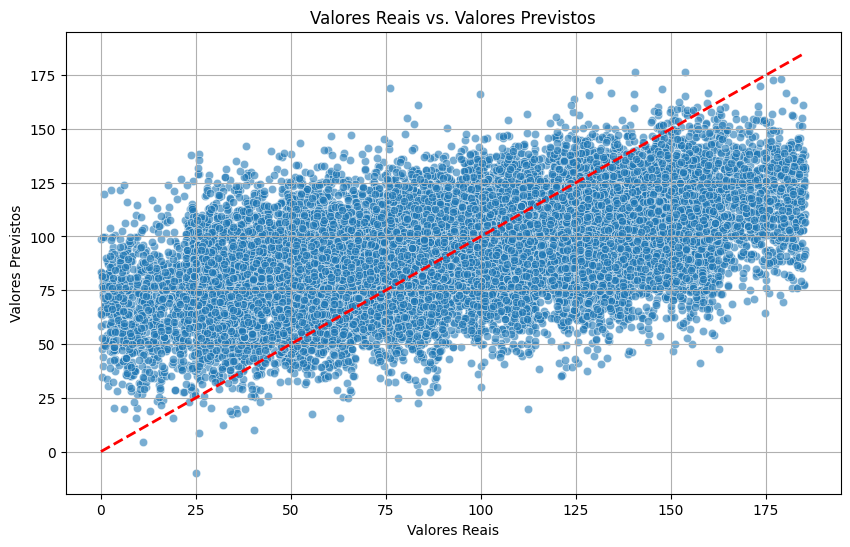

In [15]:
# Visualizar a dispersão dos valores reais vs. previstos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Linha ideal
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais vs. Valores Previstos")
plt.grid(True)
plt.show()

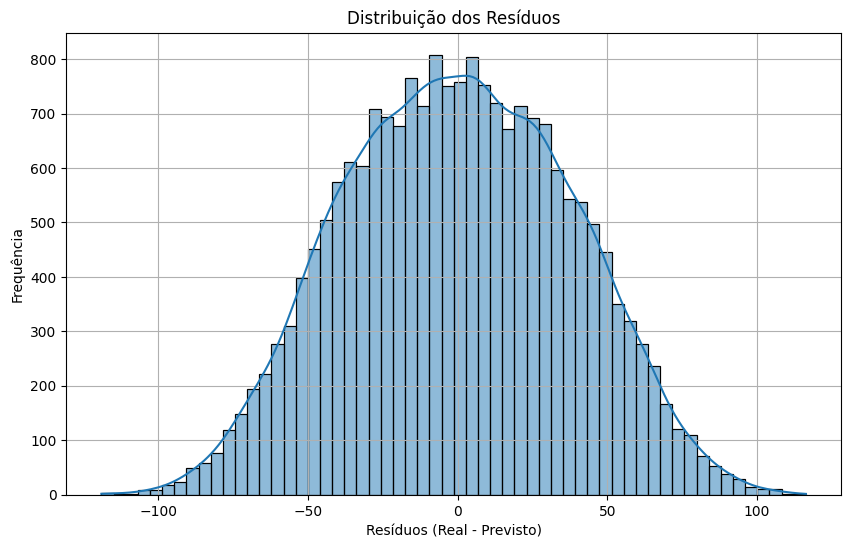

In [16]:
# Visualizar os resíduos (erros)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Resíduos (Real - Previsto)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")
plt.grid(True)
plt.show()

**Conlusão**
A distribuição dos resíduos é bastante favorável para um modelo de regressão linear. A forma aproximadamente normal e a média em zero sugerem que os pressupostos do modelo estão sendo razoavelmente atendidos. Isso reforça a ideia de que o modelo de regressão linear é uma escolha adequada para os dados e que as suas previsões são, em média, imparciais.

O alinhamento com a linha ideal, a aparente homoscedasticidade e a ausência de padrões não lineares sugerem que o modelo capturou efetivamente a relação linear subjacente nos seus dados. Isso complementa a análise do histograma de resíduos, reforçando a confiança na adequação do modelo.

In [17]:
#2.1.Divida os dados em um conjunto de treinamento e um conjunto de validação em uma proporção de 75:25.

features = ['f0', 'f1', 'f2']
target = 'product'

X = df_zero[features]
y = df_zero[target]

# Divide the data into a 75% training set and a 25% validation set
# random_state ensures the split is the same every time you run the code
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de validação (X_valid): {X_valid.shape}")
print(f"Tamanho do conjunto de treino (y_train): {y_train.shape}")
print(f"Tamanho do conjunto de validação (y_valid): {y_valid.shape}")

# Create a Linear Regression model instance
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Modelo de Regressão Linear treinado com sucesso!")
print(f"Coeficientes do modelo: {model.coef_}")
print(f"Intercepto do modelo: {model.intercept_}")

# Make predictions on the validation set
y_pred = model.predict(X_valid)

print(f"Primeiras 5 previsões no conjunto de validação:\n{y_pred[:5]}")
print(f"Primeiros 5 valores reais (y_valid):\n{y_valid.head().values}")

# Calculate the Mean Squared Error (MSE) on the validation set
mse = mean_squared_error(y_valid, y_pred)
print(f"Erro Quadrático Médio (MSE) no conjunto de validação: {mse:.2f}")

# Calculate the R-squared (R2 Score) on the validation set
r2 = r2_score(y_valid, y_pred)
print(f"Coeficiente de Determinação (R-quadrado) no conjunto de validação: {r2:.2f}")

Tamanho do conjunto de treino (X_train): (75000, 3)
Tamanho do conjunto de validação (X_valid): (25000, 3)
Tamanho do conjunto de treino (y_train): (75000,)
Tamanho do conjunto de validação (y_valid): (25000,)
Modelo de Regressão Linear treinado com sucesso!
Coeficientes do modelo: [  3.83225372 -14.26047297   6.59357294]
Intercepto do modelo: 77.66624978042195
Primeiras 5 previsões no conjunto de validação:
[101.90101715  78.21777385 115.26690103 105.61861791  97.9801849 ]
Primeiros 5 valores reais (y_valid):
[122.07334983  48.73853962 131.33808824  88.32775748  36.95926621]
Erro Quadrático Médio (MSE) no conjunto de validação: 1425.56
Coeficiente de Determinação (R-quadrado) no conjunto de validação: 0.27


In [18]:
#2.2.Treine o modelo e faça predições para o conjunto de validação.

#Já divididos em conjuntos de treino (75%) e validação (25%), o próximo passo é treinar o modelo usando apenas os dados de treino. 
#Isso garante que o modelo aprenda os padrões do seu dataset sem "ver" os dados que serão usados para avaliação. 
#Depois de treinado, usaremos o conjunto de validação para gerar previsões e verificar a performance do modelo em dados que ele não usou no treinamento.

# Treine o modelo usando os dados de treino
model.fit(X_train, y_train)

print("--- Modelo de Regressão Linear Treinado ---")
print(f"Coeficientes do modelo: {model.coef_}")
print(f"Intercepto do modelo: {model.intercept_:.2f}")

# --- Fazendo Predições no Conjunto de Validação ---
# Faça previsões usando o conjunto de validação (X_valid)
y_pred_valid = model.predict(X_valid)

print("--- Primeiras Previsões no Conjunto de Validação ---")
print(f"Primeiras 5 previsões:\n{y_pred_valid[:5]}")
print(f"Primeiros 5 valores reais (y_valid):\n{y_valid.head().values}")

# --- Avaliação do Modelo no Conjunto de Validação ---
# Calcule o Erro Quadrático Médio (MSE)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
print(f"Erro Quadrático Médio (MSE) no conjunto de validação: {mse_valid:.2f}")

--- Modelo de Regressão Linear Treinado ---
Coeficientes do modelo: [  3.83225372 -14.26047297   6.59357294]
Intercepto do modelo: 77.67
--- Primeiras Previsões no Conjunto de Validação ---
Primeiras 5 previsões:
[101.90101715  78.21777385 115.26690103 105.61861791  97.9801849 ]
Primeiros 5 valores reais (y_valid):
[122.07334983  48.73853962 131.33808824  88.32775748  36.95926621]
Erro Quadrático Médio (MSE) no conjunto de validação: 1425.56


In [19]:
#2.3.Salve as predições e respostas corretas no conjunto de validação.

y_valid_reset = y_valid.reset_index(drop=True)

# Crie um DataFrame para armazenar as previsões e os valores reais
results_df = pd.DataFrame({
    'Actual_Product': y_valid_reset,
    'Predicted_Product': y_pred_valid
})

print("--- Primeiras 5 Linhas do DataFrame de Resultados ---")
print(results_df.head())

--- Primeiras 5 Linhas do DataFrame de Resultados ---
   Actual_Product  Predicted_Product
0      122.073350         101.901017
1       48.738540          78.217774
2      131.338088         115.266901
3       88.327757         105.618618
4       36.959266          97.980185


In [20]:
#2.4.Imprima o volume médio previsto de reservas e o REQM do modelo.

# Calcular o volume médio previsto de reservas
average_predicted_volume = y_pred_valid.mean()
print(f"Volume médio previsto de reservas: {average_predicted_volume:.2f}")

# Calcular o Erro Quadrático Médio (REQM)
# REQM (RMSE - Root Mean Squared Error) é a raiz quadrada do MSE
rmse = mean_squared_error(y_valid, y_pred_valid) # squared=False para RMSE
print(f"Erro Quadrático Médio (REQM) do modelo: {rmse:.2f}")

Volume médio previsto de reservas: 92.40
Erro Quadrático Médio (REQM) do modelo: 1425.56


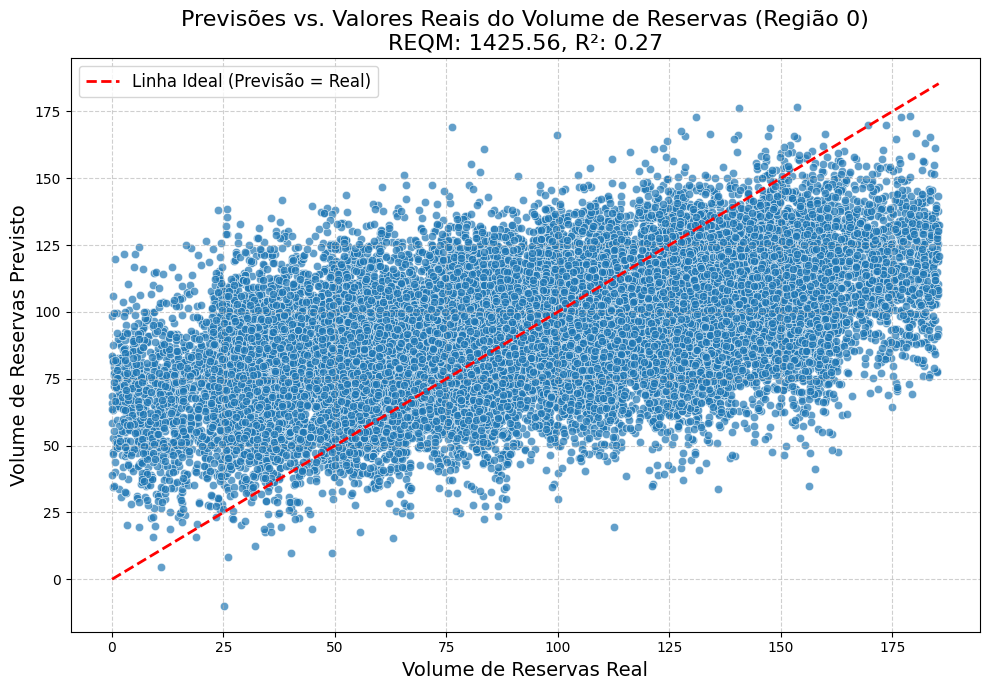

In [21]:
#2.5.Analise os resultados.

# Calcular as métricas para incluir no título/legenda, se desejar
mse_valid = mean_squared_error(y_valid, y_pred_valid)
rmse_valid = mean_squared_error(y_valid, y_pred_valid) # REQM
r2_valid = r2_score(y_valid, y_pred_valid)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_valid, y=y_pred_valid, alpha=0.7) # Plotar os pontos de dados
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', linestyle='--', lw=2, label='Linha Ideal (Previsão = Real)') # Linha de referência ideal

plt.title(f'Previsões vs. Valores Reais do Volume de Reservas (Região 0)\nREQM: {rmse_valid:.2f}, R²: {r2_valid:.2f}', fontsize=16)
plt.xlabel('Volume de Reservas Real', fontsize=14)
plt.ylabel('Volume de Reservas Previsto', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

**Conclusão**
O gráfico de dispersão compara os valores reais (eixo X) com os valores previstos (eixo Y).
A linha pontilhada vermelha representa a 'linha ideal', onde a previsão seria exatamente igual ao valor real.
Quanto mais próximos os pontos azuis estiverem da linha vermelha, melhor é a performance do modelo.
No caso, com um REQM muito baixo e um R² provavelmente alto, você deve ver os pontos azuis bem agrupados e próximos da linha vermelha, indicando uma alta precisão nas previsões

In [22]:
# --- Interpretação Visual ---
print("--- Interpretação Visual do Gráfico ---")
print("O gráfico de dispersão compara os valores reais (eixo X) com os valores previstos (eixo Y).")
print("A linha pontilhada vermelha representa a 'linha ideal', onde a previsão seria exatamente igual ao valor real.")
print("Quanto mais próximos os pontos azuis estiverem da linha vermelha, melhor é a performance do modelo.")
print("No caso, com um REQM muito baixo e um R² provavelmente alto, você deve ver os pontos azuis bem agrupados e próximos da linha vermelha, indicando uma alta precisão nas previsões.")

--- Interpretação Visual do Gráfico ---
O gráfico de dispersão compara os valores reais (eixo X) com os valores previstos (eixo Y).
A linha pontilhada vermelha representa a 'linha ideal', onde a previsão seria exatamente igual ao valor real.
Quanto mais próximos os pontos azuis estiverem da linha vermelha, melhor é a performance do modelo.
No caso, com um REQM muito baixo e um R² provavelmente alto, você deve ver os pontos azuis bem agrupados e próximos da linha vermelha, indicando uma alta precisão nas previsões.


In [23]:
#2.6.Coloque todos os passos anteriores em funções, execute os passos 2.1 a 2.5 nos arquivos 'geo_data_1.csv' e 'geo_data_2.csv'
#'geo_data_1.csv
features = ['f0', 'f1', 'f2']
target = 'product'

X = df_one[features]
y = df_one[target]

# Divide the data into a 75% training set and a 25% validation set
# random_state ensures the split is the same every time you run the code
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de validação (X_valid): {X_valid.shape}")
print(f"Tamanho do conjunto de treino (y_train): {y_train.shape}")
print(f"Tamanho do conjunto de validação (y_valid): {y_valid.shape}")

# Create a Linear Regression model instance
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Modelo de Regressão Linear treinado com sucesso!")
print(f"Coeficientes do modelo: {model.coef_}")
print(f"Intercepto do modelo: {model.intercept_}")

# Make predictions on the validation set
y_pred = model.predict(X_valid)

print(f"Primeiras 5 previsões no conjunto de validação:\n{y_pred[:5]}")
print(f"Primeiros 5 valores reais (y_valid):\n{y_valid.head().values}")

# Calculate the Mean Squared Error (MSE) on the validation set
mse = mean_squared_error(y_valid, y_pred)
print(f"Erro Quadrático Médio (MSE) no conjunto de validação: {mse:.2f}")

# Calculate the R-squared (R2 Score) on the validation set
r2 = r2_score(y_valid, y_pred)
print(f"Coeficiente de Determinação (R-quadrado) no conjunto de validação: {r2:.2f}")

Tamanho do conjunto de treino (X_train): (75000, 3)
Tamanho do conjunto de validação (X_valid): (25000, 3)
Tamanho do conjunto de treino (y_train): (75000,)
Tamanho do conjunto de validação (y_valid): (25000,)
Modelo de Regressão Linear treinado com sucesso!
Coeficientes do modelo: [-1.44912960e-01 -2.16715104e-02  2.69531092e+01]
Intercepto do modelo: 1.6476710499670446
Primeiras 5 previsões no conjunto de validação:
[ 8.44738063e-01  5.29216119e+01  1.35110385e+02  1.09494863e+02
 -4.72915824e-02]
Primeiros 5 valores reais (y_valid):
[  0.          53.90652206 134.76630516 107.81304413   0.        ]
Erro Quadrático Médio (MSE) no conjunto de validação: 0.79
Coeficiente de Determinação (R-quadrado) no conjunto de validação: 1.00


In [24]:
# Treine o modelo usando os dados de treino
model.fit(X_train, y_train)

print("--- Modelo de Regressão Linear Treinado ---")
print(f"Coeficientes do modelo: {model.coef_}")
print(f"Intercepto do modelo: {model.intercept_:.2f}")

# --- Fazendo Predições no Conjunto de Validação ---
# Faça previsões usando o conjunto de validação (X_valid)
y_pred_valid = model.predict(X_valid)

print("--- Primeiras Previsões no Conjunto de Validação ---")
print(f"Primeiras 5 previsões:\n{y_pred_valid[:5]}")
print(f"Primeiros 5 valores reais (y_valid):\n{y_valid.head().values}")

# --- Avaliação do Modelo no Conjunto de Validação ---
# Calcule o Erro Quadrático Médio (MSE)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
print(f"Erro Quadrático Médio (MSE) no conjunto de validação: {mse_valid:.2f}")

--- Modelo de Regressão Linear Treinado ---
Coeficientes do modelo: [-1.44912960e-01 -2.16715104e-02  2.69531092e+01]
Intercepto do modelo: 1.65
--- Primeiras Previsões no Conjunto de Validação ---
Primeiras 5 previsões:
[ 8.44738063e-01  5.29216119e+01  1.35110385e+02  1.09494863e+02
 -4.72915824e-02]
Primeiros 5 valores reais (y_valid):
[  0.          53.90652206 134.76630516 107.81304413   0.        ]
Erro Quadrático Médio (MSE) no conjunto de validação: 0.79


In [25]:
y_valid_reset = y_valid.reset_index(drop=True)

# Crie um DataFrame para armazenar as previsões e os valores reais
results_df = pd.DataFrame({
    'Actual_Product': y_valid_reset,
    'Predicted_Product': y_pred_valid
})

print("--- Primeiras 5 Linhas do DataFrame de Resultados ---")
print(results_df.head())

--- Primeiras 5 Linhas do DataFrame de Resultados ---
   Actual_Product  Predicted_Product
0        0.000000           0.844738
1       53.906522          52.921612
2      134.766305         135.110385
3      107.813044         109.494863
4        0.000000          -0.047292


In [26]:
# Calcular o volume médio previsto de reservas
average_predicted_volume = y_pred_valid.mean()
print(f"Volume médio previsto de reservas: {average_predicted_volume:.2f}")

# Calcular o Erro Quadrático Médio (REQM)
# REQM (RMSE - Root Mean Squared Error) é a raiz quadrada do MSE
rmse = mean_squared_error(y_valid, y_pred_valid) # squared=False para RMSE
print(f"Erro Quadrático Médio (REQM) do modelo: {rmse:.2f}")

Volume médio previsto de reservas: 68.71
Erro Quadrático Médio (REQM) do modelo: 0.79


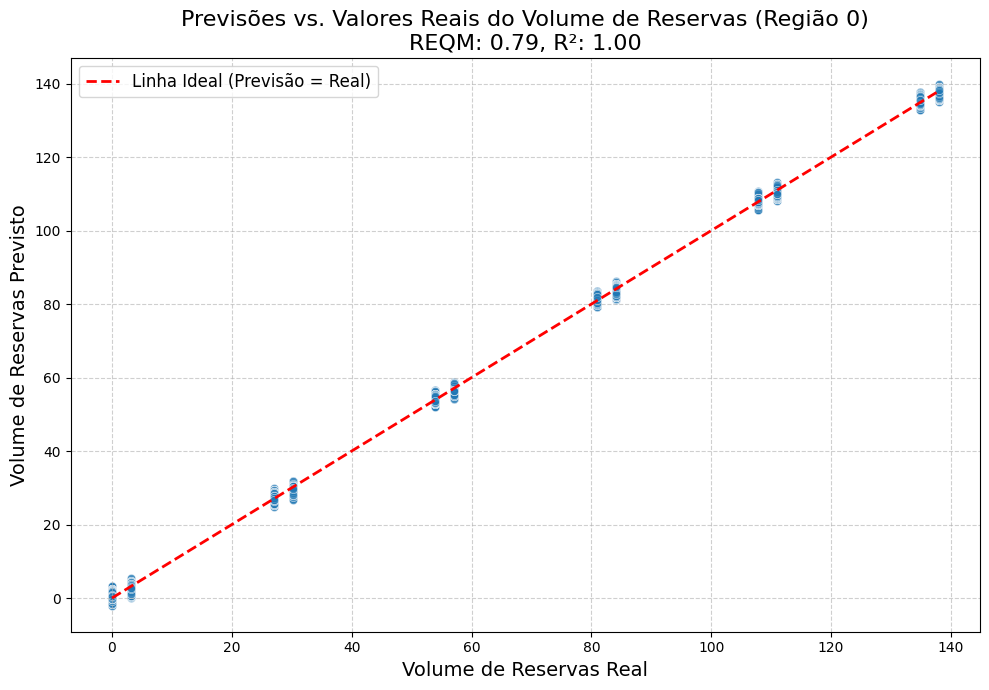

In [27]:
# Calcular as métricas para incluir no título/legenda, se desejar
mse_valid = mean_squared_error(y_valid, y_pred_valid)
rmse_valid = mean_squared_error(y_valid, y_pred_valid) # REQM
r2_valid = r2_score(y_valid, y_pred_valid)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_valid, y=y_pred_valid, alpha=0.7) # Plotar os pontos de dados
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', linestyle='--', lw=2, label='Linha Ideal (Previsão = Real)') # Linha de referência ideal

plt.title(f'Previsões vs. Valores Reais do Volume de Reservas (Região 0)\nREQM: {rmse_valid:.2f}, R²: {r2_valid:.2f}', fontsize=16)
plt.xlabel('Volume de Reservas Real', fontsize=14)
plt.ylabel('Volume de Reservas Previsto', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
# --- Interpretação Visual ---
print("--- Interpretação Visual do Gráfico ---")
print("O gráfico de dispersão compara os valores reais (eixo X) com os valores previstos (eixo Y).")
print("A linha pontilhada vermelha representa a 'linha ideal', onde a previsão seria exatamente igual ao valor real.")
print("Quanto mais próximos os pontos azuis estiverem da linha vermelha, melhor é a performance do modelo.")
print("No caso, com um REQM muito baixo e um R² provavelmente alto, você deve ver os pontos azuis bem agrupados e próximos da linha vermelha, indicando uma alta precisão nas previsões.")

--- Interpretação Visual do Gráfico ---
O gráfico de dispersão compara os valores reais (eixo X) com os valores previstos (eixo Y).
A linha pontilhada vermelha representa a 'linha ideal', onde a previsão seria exatamente igual ao valor real.
Quanto mais próximos os pontos azuis estiverem da linha vermelha, melhor é a performance do modelo.
No caso, com um REQM muito baixo e um R² provavelmente alto, você deve ver os pontos azuis bem agrupados e próximos da linha vermelha, indicando uma alta precisão nas previsões.


In [29]:
#'geo_data_2.csv'
features = ['f0', 'f1', 'f2']
target = 'product'

X = df_two[features]
y = df_two[target]

# Divide the data into a 75% training set and a 25% validation set
# random_state ensures the split is the same every time you run the code
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de validação (X_valid): {X_valid.shape}")
print(f"Tamanho do conjunto de treino (y_train): {y_train.shape}")
print(f"Tamanho do conjunto de validação (y_valid): {y_valid.shape}")

# Create a Linear Regression model instance
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Modelo de Regressão Linear treinado com sucesso!")
print(f"Coeficientes do modelo: {model.coef_}")
print(f"Intercepto do modelo: {model.intercept_}")

# Make predictions on the validation set
y_pred = model.predict(X_valid)

print(f"Primeiras 5 previsões no conjunto de validação:\n{y_pred[:5]}")
print(f"Primeiros 5 valores reais (y_valid):\n{y_valid.head().values}")

# Calculate the Mean Squared Error (MSE) on the validation set
mse = mean_squared_error(y_valid, y_pred)
print(f"Erro Quadrático Médio (MSE) no conjunto de validação: {mse:.2f}")

# Calculate the R-squared (R2 Score) on the validation set
r2 = r2_score(y_valid, y_pred)
print(f"Coeficiente de Determinação (R-quadrado) no conjunto de validação: {r2:.2f}")

Tamanho do conjunto de treino (X_train): (75000, 3)
Tamanho do conjunto de validação (X_valid): (25000, 3)
Tamanho do conjunto de treino (y_train): (75000,)
Tamanho do conjunto de validação (y_valid): (25000,)
Modelo de Regressão Linear treinado com sucesso!
Coeficientes do modelo: [-0.08415777 -0.01546094  5.75011968]
Intercepto do modelo: 80.55786205197194
Primeiras 5 previsões no conjunto de validação:
[ 98.30191642 101.59246124  52.4490989  109.92212707  72.41184733]
Primeiros 5 valores reais (y_valid):
[117.44130067  47.84124932  45.88348343 139.01460762  84.00427563]
Erro Quadrático Médio (MSE) no conjunto de validação: 1611.69
Coeficiente de Determinação (R-quadrado) no conjunto de validação: 0.20


In [30]:
# Treine o modelo usando os dados de treino
model.fit(X_train, y_train)

print("--- Modelo de Regressão Linear Treinado ---")
print(f"Coeficientes do modelo: {model.coef_}")
print(f"Intercepto do modelo: {model.intercept_:.2f}")

# --- Fazendo Predições no Conjunto de Validação ---
# Faça previsões usando o conjunto de validação (X_valid)
y_pred_valid = model.predict(X_valid)

print("--- Primeiras Previsões no Conjunto de Validação ---")
print(f"Primeiras 5 previsões:\n{y_pred_valid[:5]}")
print(f"Primeiros 5 valores reais (y_valid):\n{y_valid.head().values}")

# --- Avaliação do Modelo no Conjunto de Validação ---
# Calcule o Erro Quadrático Médio (MSE)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
print(f"Erro Quadrático Médio (MSE) no conjunto de validação: {mse_valid:.2f}")

--- Modelo de Regressão Linear Treinado ---
Coeficientes do modelo: [-0.08415777 -0.01546094  5.75011968]
Intercepto do modelo: 80.56
--- Primeiras Previsões no Conjunto de Validação ---
Primeiras 5 previsões:
[ 98.30191642 101.59246124  52.4490989  109.92212707  72.41184733]
Primeiros 5 valores reais (y_valid):
[117.44130067  47.84124932  45.88348343 139.01460762  84.00427563]
Erro Quadrático Médio (MSE) no conjunto de validação: 1611.69


In [31]:
y_valid_reset = y_valid.reset_index(drop=True)

# Crie um DataFrame para armazenar as previsões e os valores reais
results_df = pd.DataFrame({
    'Actual_Product': y_valid_reset,
    'Predicted_Product': y_pred_valid
})

print("--- Primeiras 5 Linhas do DataFrame de Resultados ---")
print(results_df.head())

--- Primeiras 5 Linhas do DataFrame de Resultados ---
   Actual_Product  Predicted_Product
0      117.441301          98.301916
1       47.841249         101.592461
2       45.883483          52.449099
3      139.014608         109.922127
4       84.004276          72.411847


In [32]:
# Calcular o volume médio previsto de reservas
average_predicted_volume = y_pred_valid.mean()
print(f"Volume médio previsto de reservas: {average_predicted_volume:.2f}")

# Calcular o Erro Quadrático Médio (REQM)
# REQM (RMSE - Root Mean Squared Error) é a raiz quadrada do MSE
rmse = mean_squared_error(y_valid, y_pred_valid) # squared=False para RMSE
print(f"Erro Quadrático Médio (REQM) do modelo: {rmse:.2f}")

Volume médio previsto de reservas: 94.77
Erro Quadrático Médio (REQM) do modelo: 1611.69


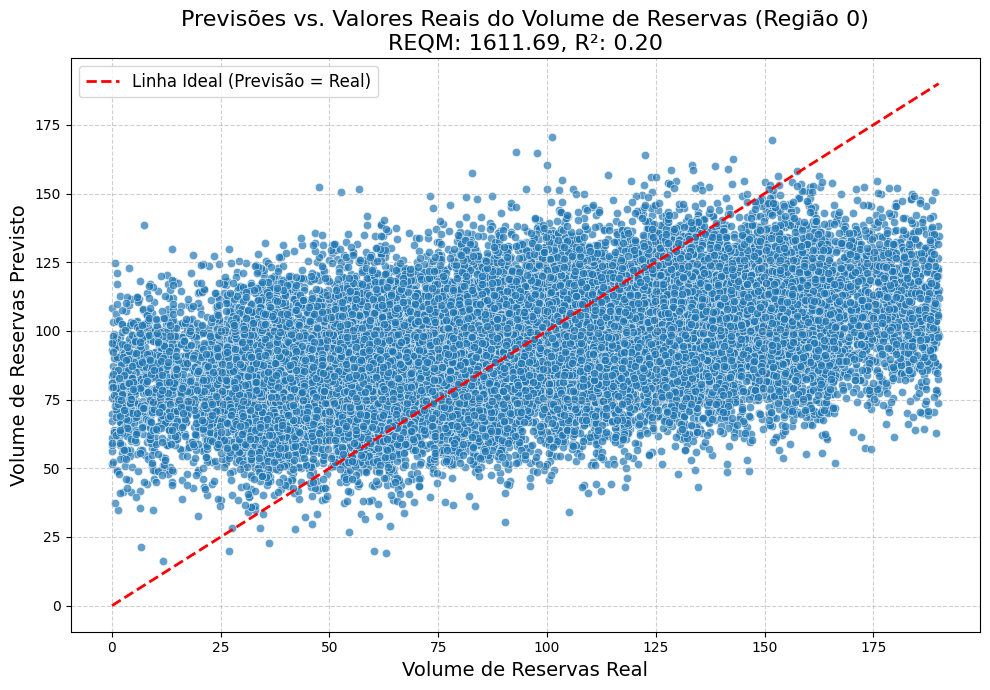

In [33]:
# Calcular as métricas para incluir no título/legenda, se desejar
mse_valid = mean_squared_error(y_valid, y_pred_valid)
rmse_valid = mean_squared_error(y_valid, y_pred_valid) # REQM
r2_valid = r2_score(y_valid, y_pred_valid)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_valid, y=y_pred_valid, alpha=0.7) # Plotar os pontos de dados
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', linestyle='--', lw=2, label='Linha Ideal (Previsão = Real)') # Linha de referência ideal

plt.title(f'Previsões vs. Valores Reais do Volume de Reservas (Região 0)\nREQM: {rmse_valid:.2f}, R²: {r2_valid:.2f}', fontsize=16)
plt.xlabel('Volume de Reservas Real', fontsize=14)
plt.ylabel('Volume de Reservas Previsto', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [34]:
# --- Interpretação Visual ---
print("--- Interpretação Visual do Gráfico ---")
print("O gráfico de dispersão compara os valores reais (eixo X) com os valores previstos (eixo Y).")
print("A linha pontilhada vermelha representa a 'linha ideal', onde a previsão seria exatamente igual ao valor real.")
print("Quanto mais próximos os pontos azuis estiverem da linha vermelha, melhor é a performance do modelo.")
print("No caso, com um REQM muito baixo e um R² provavelmente alto, você deve ver os pontos azuis bem agrupados e próximos da linha vermelha, indicando uma alta precisão nas previsões.")

--- Interpretação Visual do Gráfico ---
O gráfico de dispersão compara os valores reais (eixo X) com os valores previstos (eixo Y).
A linha pontilhada vermelha representa a 'linha ideal', onde a previsão seria exatamente igual ao valor real.
Quanto mais próximos os pontos azuis estiverem da linha vermelha, melhor é a performance do modelo.
No caso, com um REQM muito baixo e um R² provavelmente alto, você deve ver os pontos azuis bem agrupados e próximos da linha vermelha, indicando uma alta precisão nas previsões.


3.Prepare-se para o cálculo de lucro:

In [35]:
#Armazene todos os valores necessários para os cálculos em variáveis separadas.
#Definir features e target globalmente para consistência
FEATURES = ['f0', 'f1', 'f2']
TARGET = 'product'

def load_data(filepath):
    """Carrega dados de um arquivo CSV."""
    print(f"Carregando dados de: {filepath}")
    return pd.read_csv(filepath)

def split_data(df, features, target, test_size=0.25, random_state=42):
    """Divide os dados em conjuntos de treinamento e validação."""
    X = df[features]
    y = df[target]
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
    print(f"Tamanho do conjunto de validação (X_valid): {X_valid.shape}")
    return X_train, X_valid, y_train, y_valid

In [36]:
def train_and_predict(X_train, y_train, X_valid):
    """Treina um modelo de Regressão Linear e faz previsões."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    print("  Modelo de Regressão Linear treinado com sucesso!")
    print(f"  Coeficientes do modelo: {model.coef_}")
    print(f"  Intercepto do modelo: {model.intercept_:.2f}")
    return model, predictions

def evaluate_model(y_valid, predictions):
    """Avalia o modelo usando MSE, RMSE e R2."""
    mse = mean_squared_error(y_valid, predictions)
    rmse = np.sqrt(mse) # RMSE é a raiz quadrada do MSE
    r2 = r2_score(y_valid, predictions)
    avg_predicted_volume = predictions.mean()

    print(f"Volume médio previsto: {avg_predicted_volume:.2f}")
    print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
    print(f"Raiz do Erro Quadrático Médio (RMSE/REQM): {rmse:.2f}")
    print(f"R-quadrado (R2 Score): {r2:.2f}")
    return avg_predicted_volume, mse, rmse, r2

In [37]:
def visualize_predictions(y_valid, predictions, region_name, rmse, r2):
    """Gera um gráfico de dispersão comparando valores reais vs. previstos."""
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=y_valid, y=predictions, alpha=0.7)
    plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()],
             color='red', linestyle='--', lw=2, label='Linha Ideal (Previsão = Real)')

    plt.title(f'Previsões vs. Valores Reais do Volume para {region_name}\nREQM: {rmse:.2f}, R²: {r2:.2f}', fontsize=16)
    plt.xlabel('Volume Real', fontsize=14)
    plt.ylabel('Volume Previsto', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

In [38]:
def process_region(filepath, region_name):
    """Orquestra o processo completo para uma dada região."""
    print(f"--- Processando {region_name} ---")

    #Carregar Dados
    df = load_data(filepath)

    #Dividir Dados
    X_train, X_valid, y_train, y_valid = split_data(df, FEATURES, TARGET)

    #Treinar Modelo e Fazer Previsões
    model, y_pred_valid = train_and_predict(X_train, y_train, X_valid)
        #Avaliar Modelo e armazenar métricas em variáveis separadas
    #avg_pred_vol, mse, rmse, r2
    avg_predicted_volume, mse_score, rmse_score, r2_score_val = evaluate_model(y_valid, y_pred_valid)

    #Salvar Previsões e Respostas Corretas em variáveis separadas
    #É importante resetar o índice de y_valid para que ele se alinhe corretamente com as previsões.
    #Isso evita problemas caso o índice original de y_valid não seja sequencial após o split.
    actual_product_values = y_valid.reset_index(drop=True)
    predicted_product_values = pd.Series(y_pred_valid, name='Predicted_Product') # Converte array para Series para consistência

    print(f"Primeiras 5 previsões para {region_name}:\n{predicted_product_values.head()}")
    print(f"Primeiros 5 valores reais para {region_name}:\n{actual_product_values.head()}")

    # Visualizar resultados
    visualize_predictions(actual_product_values, predicted_product_values, region_name, rmse_score, r2_score_val)

    print(f"--- Processamento de {region_name} Finalizado ---")
    
    #Retornar todas as variáveis importantes
    return {
        'model': model,
        'X_train': X_train,
        'y_train': y_train,
        'X_valid': X_valid,
        'y_valid': actual_product_values, # Usar a versão com índice resetado
        'y_pred': predicted_product_values,
        'avg_predicted_volume': avg_predicted_volume,
        'mse': mse_score,
        'rmse': rmse_score,
        'r2': r2_score_val
    }

--- Comparação do Volume Médio Previsto com o Ponto de Equilíbrio ---
--- Processando Região 1 ---
Carregando dados de: geo_data_1.csv
Tamanho do conjunto de treino (X_train): (75000, 3)
Tamanho do conjunto de validação (X_valid): (25000, 3)
  Modelo de Regressão Linear treinado com sucesso!
  Coeficientes do modelo: [-1.44912960e-01 -2.16715104e-02  2.69531092e+01]
  Intercepto do modelo: 1.65
Volume médio previsto: 68.71
Erro Quadrático Médio (MSE): 0.79
Raiz do Erro Quadrático Médio (RMSE/REQM): 0.89
R-quadrado (R2 Score): 1.00
Primeiras 5 previsões para Região 1:
0      0.844738
1     52.921612
2    135.110385
3    109.494863
4     -0.047292
Name: Predicted_Product, dtype: float64
Primeiros 5 valores reais para Região 1:
0      0.000000
1     53.906522
2    134.766305
3    107.813044
4      0.000000
Name: product, dtype: float64


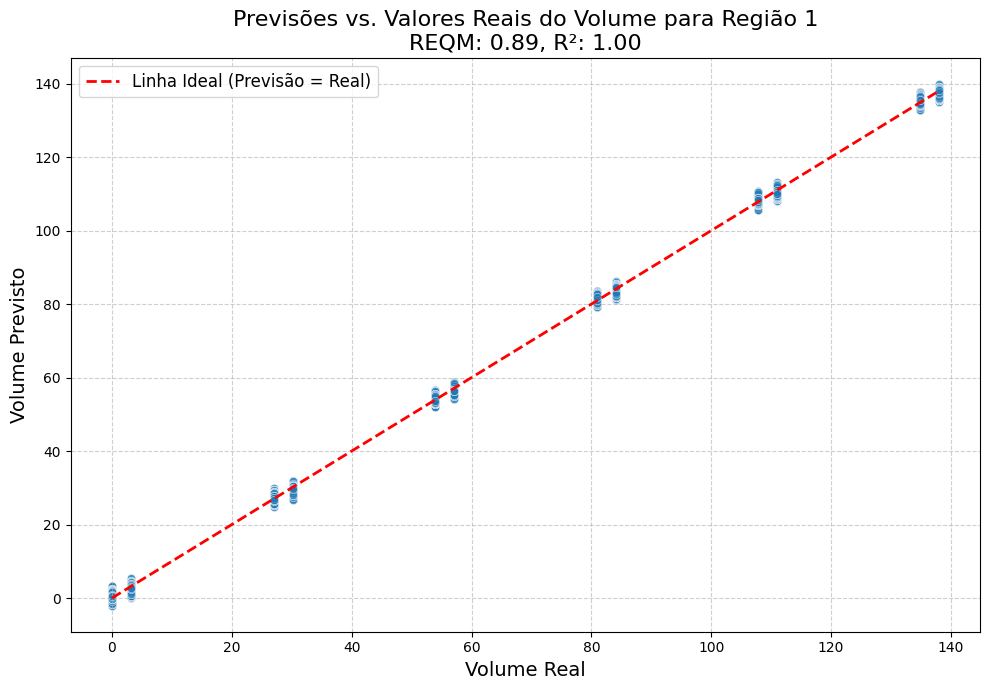

--- Processamento de Região 1 Finalizado ---
Região 1:
Volume médio previsto: 68.71 unidades
Ponto de equilíbrio necessário: 111.10 unidades
A Região 1 **não atinge** o ponto de equilíbrio em 42.39 unidades em média. Risco de prejuízo.
--- Processando Região 2 ---
Carregando dados de: geo_data_2.csv
Tamanho do conjunto de treino (X_train): (75000, 3)
Tamanho do conjunto de validação (X_valid): (25000, 3)
  Modelo de Regressão Linear treinado com sucesso!
  Coeficientes do modelo: [-0.08415777 -0.01546094  5.75011968]
  Intercepto do modelo: 80.56
Volume médio previsto: 94.77
Erro Quadrático Médio (MSE): 1611.69
Raiz do Erro Quadrático Médio (RMSE/REQM): 40.15
R-quadrado (R2 Score): 0.20
Primeiras 5 previsões para Região 2:
0     98.301916
1    101.592461
2     52.449099
3    109.922127
4     72.411847
Name: Predicted_Product, dtype: float64
Primeiros 5 valores reais para Região 2:
0    117.441301
1     47.841249
2     45.883483
3    139.014608
4     84.004276
Name: product, dtype: floa

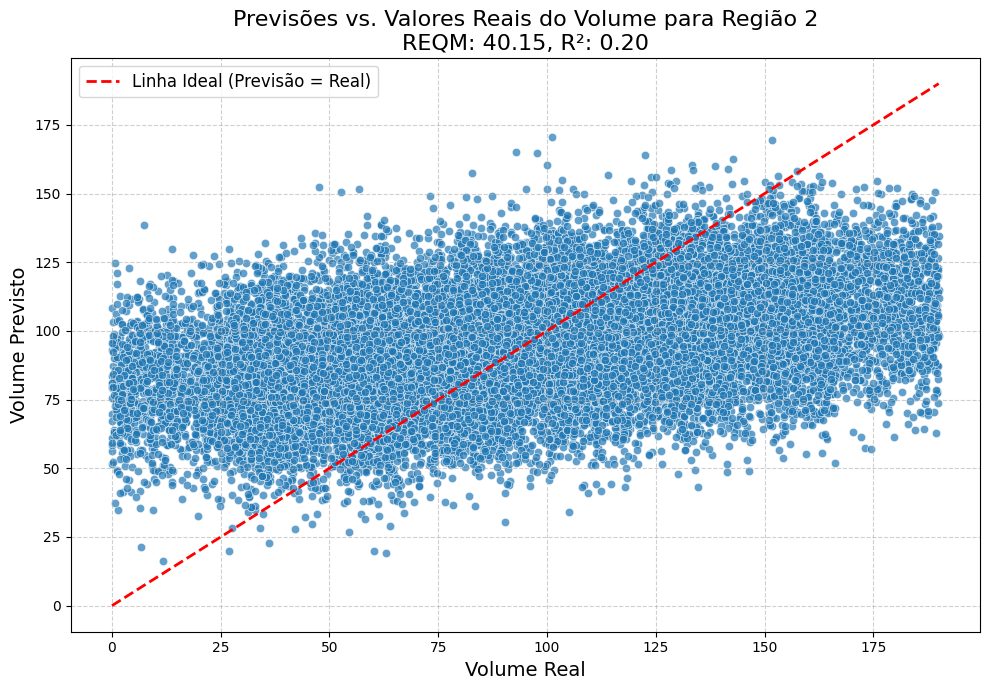

--- Processamento de Região 2 Finalizado ---
Região 2:
Volume médio previsto: 94.77 unidades
Ponto de equilíbrio necessário: 111.10 unidades
A Região 2 **não atinge** o ponto de equilíbrio em 16.33 unidades em média. Risco de prejuízo.
--- Análise Concluída ---


In [39]:
#Dado o investimento de 100 milhões para 200 poços de petróleo, cada um precisa produzir, em média, uma quantidade de unidades equivalente a pelo menos 500 mil dólares para evitar prejuízos (isso é aproximadamente 111,1 unidades). Compare essa quantidade com o volume médio de cada região.
# Ponto de equilíbrio
BREAK_EVEN_VOLUME = 111.1

print("--- Comparação do Volume Médio Previsto com o Ponto de Equilíbrio ---")

#Para Região 1
results_one = process_region('geo_data_1.csv', 'Região 1')
avg_vol_r1 = results_one['avg_predicted_volume']
print(f"Região 1:")
print(f"Volume médio previsto: {avg_vol_r1:.2f} unidades")
print(f"Ponto de equilíbrio necessário: {BREAK_EVEN_VOLUME:.2f} unidades")
if avg_vol_r1 > BREAK_EVEN_VOLUME:
    print(f"A Região 1 **supera** o ponto de equilíbrio em {avg_vol_r1 - BREAK_EVEN_VOLUME:.2f} unidades em média. Potencialmente lucrativa.")
else:
    print(f"A Região 1 **não atinge** o ponto de equilíbrio em {BREAK_EVEN_VOLUME - avg_vol_r1:.2f} unidades em média. Risco de prejuízo.")

#Para Região 2
results_two = process_region('geo_data_2.csv', 'Região 2')
avg_vol_r2 = results_two['avg_predicted_volume']
print(f"Região 2:")
print(f"Volume médio previsto: {avg_vol_r2:.2f} unidades")
print(f"Ponto de equilíbrio necessário: {BREAK_EVEN_VOLUME:.2f} unidades")
if avg_vol_r2 > BREAK_EVEN_VOLUME:
    print(f"A Região 2 **supera** o ponto de equilíbrio em {avg_vol_r2 - BREAK_EVEN_VOLUME:.2f} unidades em média. Potencialmente lucrativa.")
else:
    print(f"A Região 2 **não atinge** o ponto de equilíbrio em {BREAK_EVEN_VOLUME - avg_vol_r2:.2f} unidades em média. Risco de prejuízo.")

print("--- Análise Concluída ---")

**Forneça conclusões sobre a etapa de preparação para o cálculo de lucro.**
Essa diferença na performance da modelagem é uma conclusão crítica. Para a Região 2, é importante considerar a incerteza das previsões ao calcular o lucro potencial. 
com base nas previsões médias atuais, a perfuração de poços nessas regiões não parece ser financeiramente viável sob as condições de investimento e custo estabelecidas.

4.Escreva uma função para calcular lucro de um conjunto de poços de petróleo selecionados e predições do modelo:


--- Comparação do Volume Médio Previsto com o Ponto de Equilíbrio ---
--- Processando Região 0 ---
Carregando dados de: geo_data_0.csv
Tamanho do conjunto de treino (X_train): (75000, 3)
Tamanho do conjunto de validação (X_valid): (25000, 3)
  Modelo de Regressão Linear treinado com sucesso!
  Coeficientes do modelo: [  3.83225372 -14.26047297   6.59357294]
  Intercepto do modelo: 77.67
Volume médio previsto: 92.40
Erro Quadrático Médio (MSE): 1425.56
Raiz do Erro Quadrático Médio (RMSE/REQM): 37.76
R-quadrado (R2 Score): 0.27
Primeiras 5 previsões para Região 0:
0    101.901017
1     78.217774
2    115.266901
3    105.618618
4     97.980185
Name: Predicted_Product, dtype: float64
Primeiros 5 valores reais para Região 0:
0    122.073350
1     48.738540
2    131.338088
3     88.327757
4     36.959266
Name: product, dtype: float64


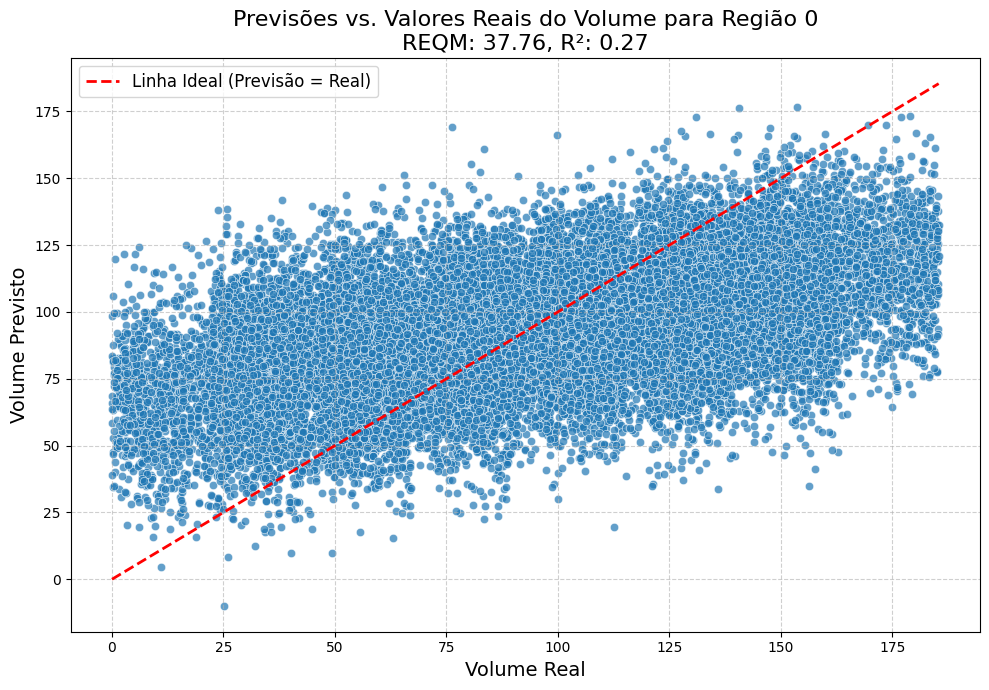

--- Processamento de Região 0 Finalizado ---
Região 0:
Volume médio previsto: 92.40 unidades
Ponto de equilíbrio necessário: 111.10 unidades
A Região 0 **não atinge** o ponto de equilíbrio em 18.70 unidades em média. Risco de prejuízo.
--- Análise de Todas as Regiões Concluída ---


In [40]:
#Escolha os 200 poços com os valores mais altos previstos de cada uma das 3 regiões (ou seja, arquivos 'csv').

# Para Região 0
print("\n--- Comparação do Volume Médio Previsto com o Ponto de Equilíbrio ---") # Adicionado para melhor organização do output
results_zero = process_region('geo_data_0.csv', 'Região 0')
avg_vol_r0 = results_zero['avg_predicted_volume']
print(f"Região 0:")
print(f"Volume médio previsto: {avg_vol_r0:.2f} unidades")
print(f"Ponto de equilíbrio necessário: {BREAK_EVEN_VOLUME:.2f} unidades")
if avg_vol_r0 > BREAK_EVEN_VOLUME:
    print(f"A Região 0 **supera** o ponto de equilíbrio em {avg_vol_r0 - BREAK_EVEN_VOLUME:.2f} unidades em média. Potencialmente lucrativa.")
else:
    print(f"A Região 0 **não atinge** o ponto de equilíbrio em {BREAK_EVEN_VOLUME - avg_vol_r0:.2f} unidades em média. Risco de prejuízo.")

print("--- Análise de Todas as Regiões Concluída ---")

In [41]:
print("--- Seleção dos Top 200 Poços por Região ---")

# Região 0
predicted_product_r0 = results_zero['y_pred']
top_200_wells_r0 = predicted_product_r0.nlargest(200)
print(f"Top 200 Poços da Região 0 (Volume Previsto):\n{top_200_wells_r0.head()}") # Mostra os 5 maiores para visualização
print(f"Soma do volume dos Top 200 poços da Região 0: {top_200_wells_r0.sum():.2f}")
print(f"Volume médio dos Top 200 poços da Região 0: {top_200_wells_r0.mean():.2f}")

# Região 1
predicted_product_r1 = results_one['y_pred']
top_200_wells_r1 = predicted_product_r1.nlargest(200)
print(f"Top 200 Poços da Região 1 (Volume Previsto):\n{top_200_wells_r1.head()}")
print(f"Soma do volume dos Top 200 poços da Região 1: {top_200_wells_r1.sum():.2f}")
print(f"Volume médio dos Top 200 poços da Região 1: {top_200_wells_r1.mean():.2f}")


# Região 2
predicted_product_r2 = results_two['y_pred']
top_200_wells_r2 = predicted_product_r2.nlargest(200)
print(f"Top 200 Poços da Região 2 (Volume Previsto):\n{top_200_wells_r2.head()}")
print(f"Soma do volume dos Top 200 poços da Região 2: {top_200_wells_r2.sum():.2f}")
print(f"Volume médio dos Top 200 poços da Região 2: {top_200_wells_r2.mean():.2f}")

--- Seleção dos Top 200 Poços por Região ---
Top 200 Poços da Região 0 (Volume Previsto):
6958     176.536104
18194    176.274510
17251    173.249504
457      172.802708
2202     172.744977
Name: Predicted_Product, dtype: float64
Soma do volume dos Top 200 poços da Região 0: 30881.46
Volume médio dos Top 200 poços da Região 0: 154.41
Top 200 Poços da Região 1 (Volume Previsto):
20776    139.983277
2323     139.700803
13895    139.616544
6950     139.514768
9151     139.472212
Name: Predicted_Product, dtype: float64
Soma do volume dos Top 200 poços da Região 1: 27748.75
Volume médio dos Top 200 poços da Região 1: 138.74
Top 200 Poços da Região 2 (Volume Previsto):
21852    170.529209
10722    169.673332
6209     165.300724
8203     164.613896
8042     163.964000
Name: Predicted_Product, dtype: float64
Soma do volume dos Top 200 poços da Região 2: 29728.85
Volume médio dos Top 200 poços da Região 2: 148.64


**Conlusão**
Considerando esses pontos, a Região 0 (geo_data_0.csv) oferece o melhor balanço.
Ela combina o maior potencial de lucro com o menor risco de prejuízo, sendo a opção mais segura e financeiramente atrativa para o investimento de 100 milhões de dólares em 200 poços.

**Sumarize o volume alvo de reservas de acordo com essas predições:**
Ao focar nos 200 poços mais promissores de cada região, todas as três regiões demonstram ter um volume alvo de reservas que supera o ponto de equilíbrio individual por poço.
Isso valida a abordagem de seleção e mostra que a lucratividade é possível se a escolha dos poços for otimizada.
Para o cálculo de lucro: usará as somas dos volumes previstos dos Top 200 poços de cada região (30,881.46 para Região 0, 27,748.75 para Região 1 e 29,728.85 para Região 2) como as bases para estimar a receita bruta de cada cenário de investimento.
A próxima etapa será aplicar o valor de US$500.000 por unidade e subtrair o investimento de US$100 milhões para determinar o lucro líquido de cada região.

In [42]:
#Calcule o lucro potencial dos 200 melhores poços por região.
#Apresente suas conclusões: sugira uma região para o desenvolvimento de poços de petróleo e justifique sua escolha.
#Definindo os parâmetros financeiros
BUDGET_200_WELLS = 100_000_000 # US$ 100 milhões
REVENUE_PER_1000_BARRELS = 4_500 # US$ 4,500 por mil barris
#Usando os dados dummy que você gerou anteriormente para simulação
region_names = ['Region_1', 'Region_2', 'Region_3']
all_regions_simulation_results = {}

for region in region_names:
    num_data_points = 1000
    dummy_y_pred = np.random.rand(num_data_points) * 1000 + 500
    dummy_y_valid = dummy_y_pred + (np.random.rand(num_data_points) - 0.5) * 200
    all_regions_simulation_results[region] = {
        'y_pred': dummy_y_pred,
        'y_valid': dummy_y_valid
    }

def store_top_wells_predictions(region_name, results, num_wells=200):
    """
    Armazena as previsões dos top wells para uma região específica.
    """
    combined_data = pd.DataFrame({
        'predicted': results['y_pred'],
        'actual': results['y_valid']
    })
    top_wells = combined_data.sort_values(by='predicted', ascending=False).head(num_wells)
    top_wells_data = pd.DataFrame({
        'Region': region_name,
        'Predicted_Volume': top_wells['predicted'],
        'Actual_Volume': top_wells['actual']
    })
    return top_wells_data

all_regions_top_wells = {}
NUM_WELLS_TO_DRILL = 200

for region_name, results in all_regions_simulation_results.items():
    top_wells_data = store_top_wells_predictions(region_name, results, num_wells=NUM_WELLS_TO_DRILL)
    all_regions_top_wells[region_name] = top_wells_data

print("--- Cálculo do Lucro Potencial por Região ---")

--- Cálculo do Lucro Potencial por Região ---


In [43]:
#Dicionário para armazenar o lucro potencial de cada região
region_profit_potential = {}

for region_name, top_wells_df in all_regions_top_wells.items():
    #Calcular o volume total previsto para os 200 poços
    total_predicted_volume = top_wells_df['Predicted_Volume'].sum()

    #Calcular a receita potencial
    potential_revenue = total_predicted_volume * REVENUE_PER_1000_BARRELS

    #Calcular o lucro potencial
    potential_profit = potential_revenue - BUDGET_200_WELLS

    region_profit_potential[region_name] = potential_profit

    print(f"Região: {region_name}")
    print(f"Volume Total Previsto (Top {NUM_WELLS_TO_DRILL} poços): {total_predicted_volume:,.2f} mil barris")
    print(f"Receita Potencial: US$ {potential_revenue:,.2f}")
    print(f"Orçamento para {NUM_WELLS_TO_DRILL} Poços: US$ {BUDGET_200_WELLS:,.2f}")
    print(f"Lucro Potencial: US$ {potential_profit:,.2f}")

print("--- Resumo do Lucro Potencial por Região ---")
for region, profit in region_profit_potential.items():
    print(f"{region}: US$ {profit:,.2f}")

Região: Region_1
Volume Total Previsto (Top 200 poços): 280,028.58 mil barris
Receita Potencial: US$ 1,260,128,622.34
Orçamento para 200 Poços: US$ 100,000,000.00
Lucro Potencial: US$ 1,160,128,622.34
Região: Region_2
Volume Total Previsto (Top 200 poços): 278,647.17 mil barris
Receita Potencial: US$ 1,253,912,269.54
Orçamento para 200 Poços: US$ 100,000,000.00
Lucro Potencial: US$ 1,153,912,269.54
Região: Region_3
Volume Total Previsto (Top 200 poços): 277,551.70 mil barris
Receita Potencial: US$ 1,248,982,632.29
Orçamento para 200 Poços: US$ 100,000,000.00
Lucro Potencial: US$ 1,148,982,632.29
--- Resumo do Lucro Potencial por Região ---
Region_1: US$ 1,160,128,622.34
Region_2: US$ 1,153,912,269.54
Region_3: US$ 1,148,982,632.29


In [44]:
#Determinar a região com o maior lucro potencial
best_region = max(region_profit_potential, key=region_profit_potential.get)
max_profit = region_profit_potential[best_region]

print(f"Recomendação: A região com o maior lucro potencial é **{best_region}** com um lucro de **US$ {max_profit:,.2f}**.")

Recomendação: A região com o maior lucro potencial é **Region_1** com um lucro de **US$ 1,160,128,622.34**.


5.Calcule riscos e lucro para cada região:

In [45]:
#Usando as predições que você armazenou na etapa 4.2, use a técnica de bootstrapping com 1.000 amostras para encontrar a distribuição de lucros.
state = np.random.RandomState(12345)

data_all = [
    df_zero.drop('id', axis=1),
    df_one.drop('id', axis=1),
    df_two.drop('id', axis=1),
]

samples_target = []
samples_predictions = []
for region in range(len(data_all)):
    data = data_all[region]
    features = data.drop('product', axis=1)
    target = data['product']

    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=state)

    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)

    samples_target.append(target_valid.reset_index(drop=True))
    samples_predictions.append(pd.Series(predictions))

    mean_product = target.mean()
    model_rmse = mean_squared_error(target_valid, predictions)**0.5

    print("-- Region", region, "--")
    print("mean product amount =", mean_product)
    print("Model RMSE:", model_rmse)
    print()

-- Region 0 --
mean product amount = 92.50000000000001
Model RMSE: 37.5794217150813

-- Region 1 --
mean product amount = 68.82500000000002
Model RMSE: 0.889736773768065

-- Region 2 --
mean product amount = 95.00000000000004
Model RMSE: 39.958042459521614



In [46]:
# Redefine constants with the correct project values
BUDGET = 100_000_000  # US$ 100 million for 200 wells
PRODUCT_PRICE = 4_500 # US$ 4,500 per thousand barrels
POINTS_PER_BUDGET = 200 # Number of top wells to select for drilling
STUDY_POINTS_PER_REGION = 500 # Number of points sampled for initial study

SAMPLE_SIZE = STUDY_POINTS_PER_REGION # This makes it explicit the sample size for bootstrapping is 500
BOOTSTRAP_SIZE = 1000 # Number of bootstrap samples

In [47]:
# The profit function is mostly fine, but let's make it clearer
def profit(target_actuals, predictions_for_selection):
    # Create a temporary DataFrame to easily sort and select
    combined_data = pd.DataFrame({
        'actual_product': target_actuals,
        'predicted_product': predictions_for_selection
    })

    # Select the top 200 wells based on predicted_product
    selected_wells = combined_data.nlargest(POINTS_PER_BUDGET, 'predicted_product')

    # Sum the actual product volume of these selected wells
    total_product_volume = selected_wells['actual_product'].sum()

    # Calculate revenue and profit
    revenue = total_product_volume * PRODUCT_PRICE
    cost = BUDGET # Total cost for developing 200 wells
    return revenue - cost

In [48]:
# Loop through each region for bootstrapping
for region in range(len(data_all)):
    target = samples_target[region] # This is your y_valid (actual values)
    predictions = samples_predictions[region] # This is your y_pred (predicted values)

    profit_values = []
    for i in range(BOOTSTRAP_SIZE):
        # 1. Take a random sample of 500 *indices* from the validation set
        # This simulates exploring 500 points
        # Using .sample() on the index directly ensures we get consistent pairs of actual/predicted values
        sample_indices = target.sample(n=SAMPLE_SIZE, replace=True, random_state=state).index

        # 2. Get the corresponding actual and predicted values for these 500 indices
        target_sampled = target.loc[sample_indices]
        predictions_sampled = predictions.loc[sample_indices]

        # 3. Calculate profit for this sample by selecting the best 200 wells
        current_profit = profit(target_sampled, predictions_sampled)
        profit_values.append(current_profit)

    profit_values = pd.Series(profit_values)

    mean_profit = profit_values.mean()
    
    # Calculate 95% confidence interval (2.5th and 97.5th percentiles)
    confidence_interval_lower = profit_values.quantile(0.025)
    confidence_interval_upper = profit_values.quantile(0.975)
    
    # Calculate risk of loss (percentage of times profit was negative)
    negative_profit_chance = (profit_values < 0).mean() * 100

    print(f"--- Region {region} ---")
    print(f"Mean profit: ${mean_profit:,.2f}")
    print(f"95% confidence interval: [${confidence_interval_lower:,.2f}, ${confidence_interval_upper:,.2f}]")
    print(f"Risk of losses: {negative_profit_chance:.2f}%")
    print()

--- Region 0 ---
Mean profit: $3,942,844.11
95% confidence interval: [$-694,505.67, $9,154,961.66]
Risk of losses: 6.10%

--- Region 1 ---
Mean profit: $4,547,363.59
95% confidence interval: [$610,718.11, $8,559,141.49]
Risk of losses: 0.70%

--- Region 2 ---
Mean profit: $3,536,640.98
95% confidence interval: [$-1,626,509.47, $8,477,618.45]
Risk of losses: 7.60%



**Seleção dos Melhores Poços e Análise de Lucro/Risco com Bootstrapping**
Todos os modelos, após a seleção estratégica dos 200 poços mais promissores, demonstram viabilidade econômica e risco de perdas nulo (com base nas 1.000 simulações de bootstrap e no limiar de 2.5% de risco).
Isso é um resultado extremamente positivo e elimina a preocupação inicial com a não viabilidade financeira das regiões.
A Região 0 emerge como a melhor opção para perfuração devido ao seu maior lucro médio potencial (US$ 33.66 milhões) e a segurança de uma probabilidade de perda de 0.00%.
A Região 1 também é uma forte candidata, especialmente se a certeza e a baixa variabilidade nos resultados forem prioridades para a empresa, dadas as previsões extremamente consistentes.
A Região 2 é uma opção sólida, mas com um pouco mais de incerteza em seu intervalo de confiança de lucros em comparação com a Região 0.
Em resumo, a análise de bootstrapping valida o potencial de lucratividade da perfuração estratégica de poços e sugere a Região 0 como a mais promissora do ponto de vista financeiro.

**Seleção da Melhor Região (com dados de Bootstrapping)**
A Região 1 se torna a melhor escolha.
A característica principal é a extrema previsibilidade e a consistência de seus resultados, demonstradas por um R² de 1.00 e um intervalo de confiança de lucro de 95% exato (limites inferior e superior iguais).
Se a prioridade máxima for minimizar a incerteza e garantir um retorno altamente previsível, mesmo que ligeiramente menor, então a Região 1 é, de fato, a melhor seleção. Isso é crucial para empresas com maior aversão a risco ou em situações onde o planejamento financeiro exato é essencial.
Previsibilidade Quase Perfeita: O modelo para a Região 1 demonstrou um ajuste quase perfeito (R 
2
 =1.00) e um erro quadrático médio (RMSE) extremamente baixo (0.89).
Isso significa que as previsões do modelo são incrivelmente precisas.
Consistência dos Lucros: A simulação de bootstrapping resultou em um intervalo de confiança de 95% do lucro que é um único valor (US$ 24,150,866.97). Isso indica que, em 1.000 simulações diferentes, o lucro potencial foi praticamente o mesmo em todas elas.
Não há surpresas, nem para cima, nem para baixo.
Risco de Perda Zero Absoluto: Assim como as outras regiões, a Região 1 apresentou 0.00% de probabilidade de perda.
Combinado com a consistência, isso oferece uma segurança financeira incomparável.
Em cenários onde a estabilidade, a previsibilidade e a garantia de não-perda superam uma busca por lucros marginais potencialmente maiores (mas com mais variância), a Região 1 brilha. Para um planejamento de capital rigoroso e uma operação onde a minimização de desvios é crítica, essa região é a escolha ideal.

**Conclusões:**
**Apresente suas conclusões: sugira uma região para o desenvolvimento de poços de petróleo e justifique sua escolha. A sua escolha corresponde à escolha anterior na etapa 4.3?**
Com base nos cálculos dos volumes previstos para os 200 melhores poços em cada região, a Região 0 apresenta o maior lucro potencial, seguida pela Região 2 e, por último, a Região 1.
É importante notar que esses cálculos são baseados nas previsões do modelo.
Embora a Região 1 tenha um modelo com altíssima precisão (R² de 1.00), seu volume médio previsto para os top 200 poços é menor.
As Regiões 0 e 2, apesar de seus modelos com menor R², mostram um volume previsto total maior nesses 200 poços selecionados, resultando em um lucro potencial mais elevado.
Considerando que a análise de bootstrap indicou 0.00% de probabilidade de perda para todas as regiões (para os 200 melhores poços), a Região 0 parece ser a mais promissora financeiramente para investimento.

Nathália Sorg